# Investing in Nashville

A real estate company wants to invest in properties in Nashville and plans to visit next week to find the best value. As a data scientist, I have to analyze a dataset they have acquired regarding recent sales and build a model to predict underpriced properties. This will help them shortlist the properties to visit and thus save time and money.

# Cleansing, EDA

In [45]:
import numpy as np
import pandas as pd
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Nashville_housing_data.csv')
df.head()

Unnamed: 0        Parcel ID       Land Use   Property Address  \
0           1  105 11 0 080.00  SINGLE FAMILY   1802  STEWART PL   
1           2  118 03 0 130.00  SINGLE FAMILY  2761  ROSEDALE PL   
2           3  119 01 0 479.00  SINGLE FAMILY  224  PEACHTREE ST   
3           4  119 05 0 186.00  SINGLE FAMILY      316  LUTIE ST   
4           5  119 05 0 387.00  SINGLE FAMILY   2626  FOSTER AVE   

   Suite/ Condo   # Property City  Sale Date   Legal Reference Sold As Vacant  \
0               NaN     NASHVILLE  1/11/2013  20130118-0006337             No   
1               NaN     NASHVILLE  1/18/2013  20130124-0008033             No   
2               NaN     NASHVILLE  1/18/2013  20130128-0008863             No   
3               NaN     NASHVILLE  1/23/2013  20130131-0009929             No   
4               NaN     NASHVILLE   1/4/2013  20130118-0006110             No   

  Multiple Parcels Involved in Sale  ... Building Value Finished Area  \
0                                No  ...         134400    1149.00000   
1                                No  ...         157800    2090.82495   
2                                No  ...         243700    2145.60001   
3                                No  ...         138100    1969.00000   
4                                No  ...          86100    1037.00000   

   Foundation Type Year Built  Exterior Wall  Grade  Bedrooms  Full Bath  \
0          PT BSMT       1941          BRICK   C          2.0        1.0   
1             SLAB       2000    BRICK/FRAME   C          3.0        2.0   
2        FULL BSMT       1948    BRICK/FRAME   B          4.0        2.0   
3            CRAWL       1910          FRAME   C          2.0        1.0   
4            CRAWL       1945          FRAME   C          2.0        1.0   

  Half Bath  Sale Price Compared To Value  
0       0.0                          Over  
1       1.0                          Over  
2       0.0                         Under  
3       0.0                         Under  
4       0.0                         Under  

[5 rows x 26 columns]

In [3]:
df.columns = df.columns.str.replace(' ','')

In [4]:
df.dtypes

Unnamed:0                          int64
ParcelID                          object
LandUse                           object
PropertyAddress                   object
Suite/Condo#                     float64
PropertyCity                      object
SaleDate                          object
LegalReference                    object
SoldAsVacant                      object
MultipleParcelsInvolvedinSale     object
City                              object
State                             object
Acreage                          float64
TaxDistrict                       object
Neighborhood                       int64
LandValue                          int64
BuildingValue                      int64
FinishedArea                     float64
FoundationType                    object
YearBuilt                          int64
ExteriorWall                      object
Grade                             object
Bedrooms                         float64
FullBath                         float64
HalfBath        

In [5]:
for col in df.iloc[:,[2,4,5,8,9,10,11,13,18,20,21,22,23,24,25]]:
    print(col,df[col].unique())

LandUse ['SINGLE FAMILY' 'DUPLEX' 'RESIDENTIAL COMBO/MISC' 'QUADPLEX']
Suite/Condo# [nan]
PropertyCity ['NASHVILLE' 'ANTIOCH' 'BRENTWOOD' 'MADISON' 'OLD HICKORY' 'HERMITAGE'
 'GOODLETTSVILLE' 'JOELTON' 'WHITES CREEK' 'MOUNT JULIET' nan]
SoldAsVacant ['No' 'Yes']
MultipleParcelsInvolvedinSale ['No' 'Yes']
City ['NASHVILLE' 'ANTIOCH' 'BRENTWOOD' 'MADISON' 'OLD HICKORY' 'HERMITAGE'
 'GOODLETTSVILLE' 'JOELTON' 'WHITES CREEK' 'MOUNT JULIET']
State ['TN']
TaxDistrict ['URBAN SERVICES DISTRICT' 'CITY OF BERRY HILL'
 'GENERAL SERVICES DISTRICT' 'CITY OF BELLE MEADE' 'CITY OF OAK HILL'
 'CITY OF FOREST HILLS' 'CITY OF GOODLETTSVILLE']
FoundationType ['PT BSMT' 'SLAB' 'FULL BSMT' 'CRAWL' 'PIERS' nan 'TYPICAL']
ExteriorWall ['BRICK' 'BRICK/FRAME' 'FRAME' 'FRAME/STONE' 'STONE' 'STUCCO' 'CONC BLK'
 'LOG' 'METAL']
Grade ['C   ' 'B   ' 'D   ' 'A   ' 'X   ' 'E   ' 'SSC ' 'OFC ' 'AAB ' 'OFB ']
Bedrooms [ 2.  3.  4.  7.  6.  5.  1. 10.  8.  0. nan  9. 11.]
FullBath [ 1.  2.  4.  3.  5.  6. 10.  8.  0.  

In [6]:
df.SaleDate = pd.to_datetime(df.SaleDate, format="%m/%d/%Y")
df.SaleDate.max()

Timestamp('2016-10-31 00:00:00')

In [7]:
df['DaysSinceLastSale'] = (pd.to_datetime('2016-11-01')-df['SaleDate']).dt.days

In [8]:
df.groupby(["PropertyCity","City"]).size().reset_index(name="Freq")

PropertyCity            City   Freq
0          ANTIOCH         ANTIOCH   1133
1        BRENTWOOD       BRENTWOOD    157
2        BRENTWOOD       NASHVILLE      1
3   GOODLETTSVILLE  GOODLETTSVILLE    435
4        HERMITAGE       HERMITAGE    913
5          JOELTON         JOELTON     11
6          MADISON         MADISON   1146
7     MOUNT JULIET    MOUNT JULIET      6
8        NASHVILLE       NASHVILLE  18010
9      OLD HICKORY     OLD HICKORY    824
10    WHITES CREEK    WHITES CREEK     13

In [9]:
df=df.loc[~((df['PropertyCity']=='BRENTWOOD')&(df['City']=='NASHVILLE'))]

In [10]:
df = df.drop(['Unnamed:0','ParcelID','PropertyCity','PropertyAddress','Suite/Condo#','SaleDate','LegalReference','State'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22650 entries, 0 to 22650
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LandUse                        22650 non-null  object 
 1   SoldAsVacant                   22650 non-null  object 
 2   MultipleParcelsInvolvedinSale  22650 non-null  object 
 3   City                           22650 non-null  object 
 4   Acreage                        22650 non-null  float64
 5   TaxDistrict                    22650 non-null  object 
 6   Neighborhood                   22650 non-null  int64  
 7   LandValue                      22650 non-null  int64  
 8   BuildingValue                  22650 non-null  int64  
 9   FinishedArea                   22649 non-null  float64
 10  FoundationType                 22649 non-null  object 
 11  YearBuilt                      22650 non-null  int64  
 12  ExteriorWall                   22650 non-null 

In [12]:
df.Neighborhood = df.Neighborhood.astype(str)

plot 1. missing feature distributions


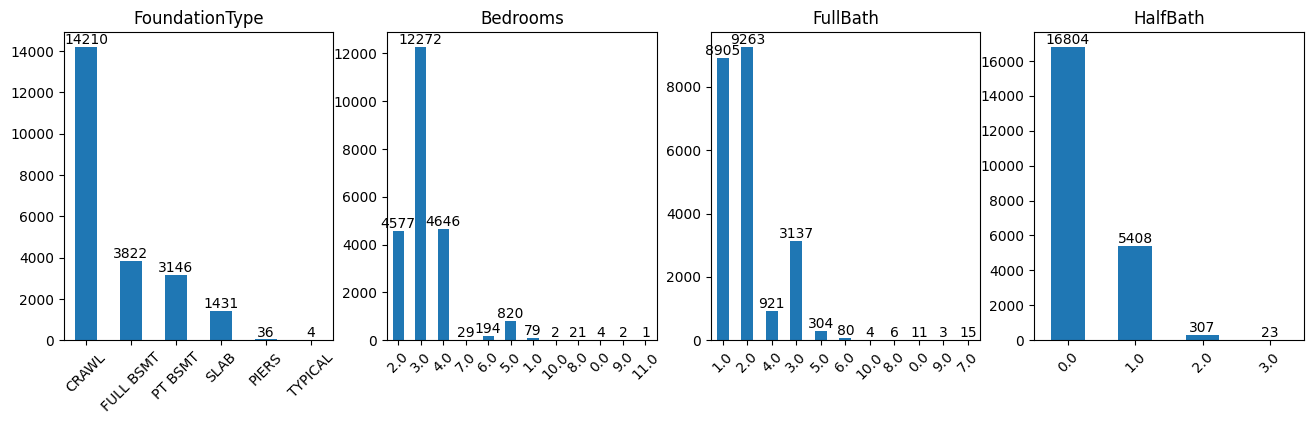

In [13]:
print('\033[1m' + 'plot 1. missing feature distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,4,1); ax = df.FoundationType.value_counts().plot.bar(title='FoundationType')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,2); ax = df.Bedrooms.value_counts(sort=False).plot.bar(title='Bedrooms')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,3); ax = df.FullBath.value_counts(sort=False).plot.bar(title='FullBath')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,4); ax = df.HalfBath.value_counts(sort=False).plot.bar(title='HalfBath')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

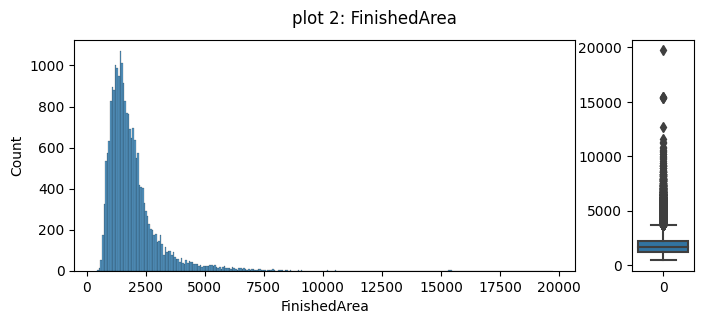

In [14]:
fig, axs = plt.subplots(1,2,figsize=(8,3),gridspec_kw={"width_ratios": (8, 1)})
fig.suptitle('plot 2: FinishedArea')
sns.histplot(ax=axs[0], data=df.FinishedArea)
sns.boxplot(ax=axs[1], data=df.FinishedArea)
plt.show()

In [15]:
df = df[df.FinishedArea < 13000]

In [16]:
df.FoundationType = df.FoundationType.fillna('CRAWL')
df.FinishedArea = df.FinishedArea.fillna(df.FinishedArea.median())
df.Bedrooms = df.Bedrooms.fillna(3)
df.Bedrooms = df.Bedrooms.astype(int64)
df.HalfBath = df.HalfBath.fillna(0)
df.HalfBath = df.HalfBath.astype(int64)
df = df.dropna(subset=['FullBath'])
df.FullBath = df.FullBath.astype(int64)

### Anamoly Detection & Exploratory Data Analysis

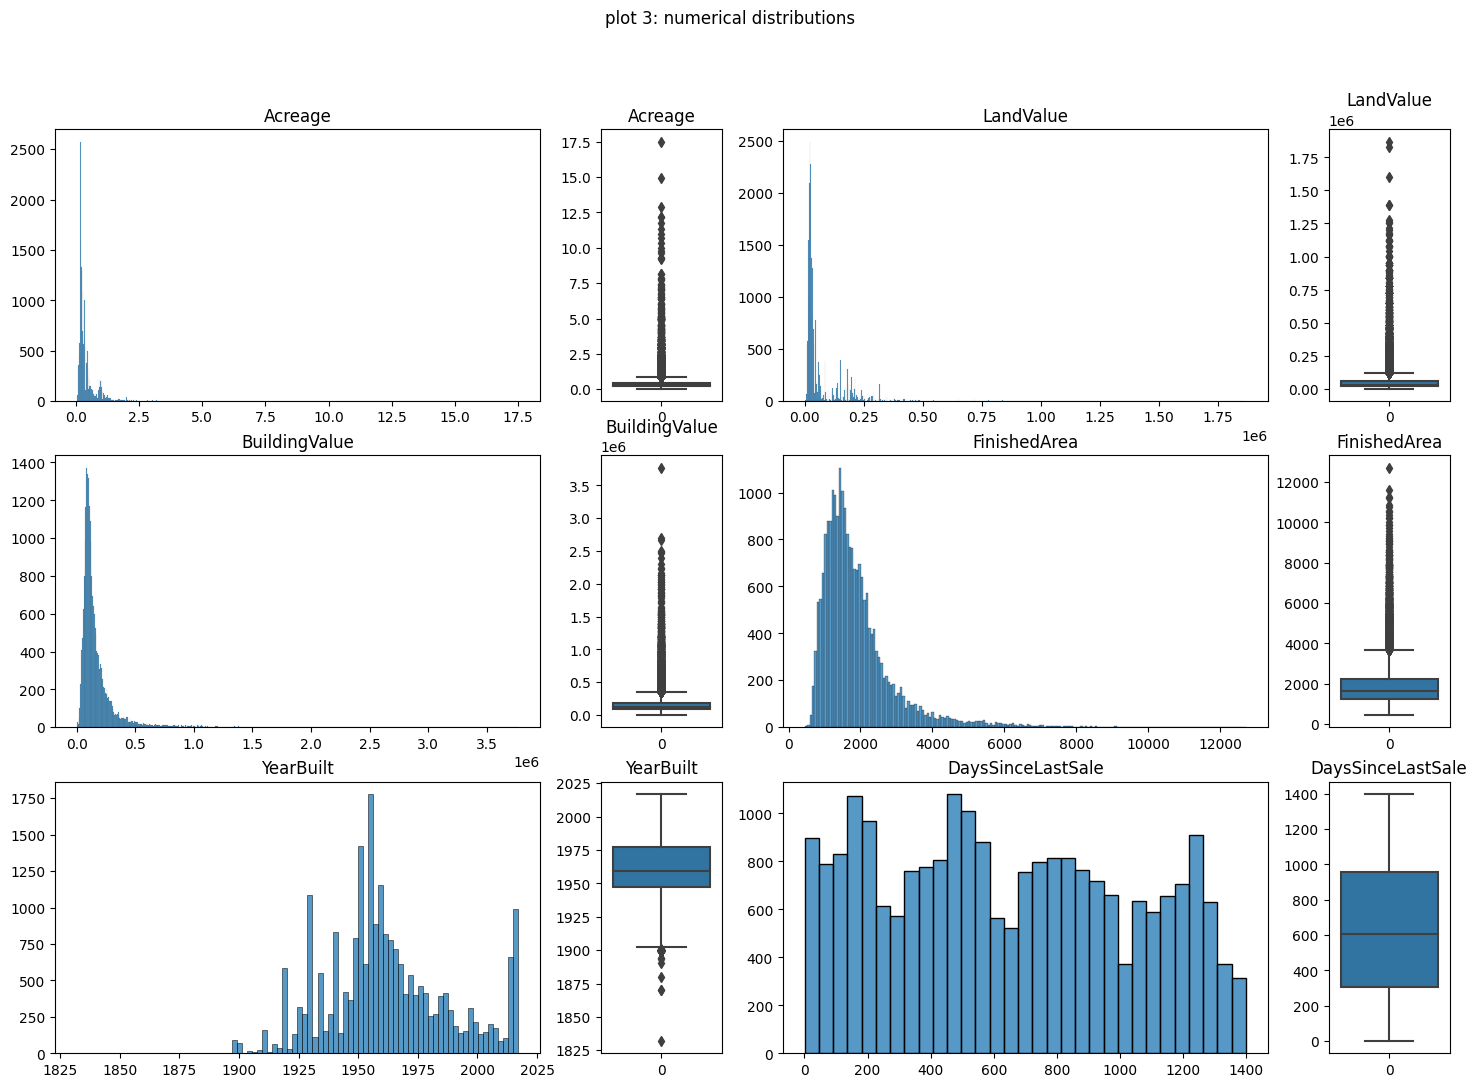

In [17]:
fig, axs = plt.subplots(3,4,figsize=(18,12),gridspec_kw={"width_ratios": (8,2,8,2)})
fig.suptitle('plot 3: numerical distributions')
sns.histplot(ax=axs[0,0],data=df.Acreage).set(xlabel=None,ylabel=None,title='Acreage')
sns.boxplot(ax=axs[0,1],data=df.Acreage).set(xlabel=None,ylabel=None,title='Acreage')
sns.histplot(ax=axs[0,2],data=df.LandValue).set(xlabel=None,ylabel=None,title='LandValue')
sns.boxplot(ax=axs[0,3],data=df.LandValue).set(xlabel=None,ylabel=None,title='LandValue')
sns.histplot(ax=axs[1,0],data=df.BuildingValue).set(xlabel=None,ylabel=None,title='BuildingValue')
sns.boxplot(ax=axs[1,1],data=df.BuildingValue).set(xlabel=None,ylabel=None,title='BuildingValue')
sns.histplot(ax=axs[1,2],data=df.FinishedArea).set(xlabel=None,ylabel=None,title='FinishedArea')
sns.boxplot(ax=axs[1,3],data=df.FinishedArea).set(xlabel=None,ylabel=None,title='FinishedArea')
sns.histplot(ax=axs[2,0],data=df.YearBuilt).set(xlabel=None,ylabel=None,title='YearBuilt')
sns.boxplot(ax=axs[2,1],data=df.YearBuilt).set(xlabel=None,ylabel=None,title='YearBuilt')
sns.histplot(ax=axs[2,2],data=df.DaysSinceLastSale).set(xlabel=None,ylabel=None,title='DaysSinceLastSale')
sns.boxplot(ax=axs[2,3],data=df.DaysSinceLastSale).set(xlabel=None,ylabel=None,title='DaysSinceLastSale')
plt.show()

In [18]:
df = df[df.Acreage < 15]
df = df[df.BuildingValue < 3000000]
df = df[df.YearBuilt > 1875]

plot 4. categorical distributions


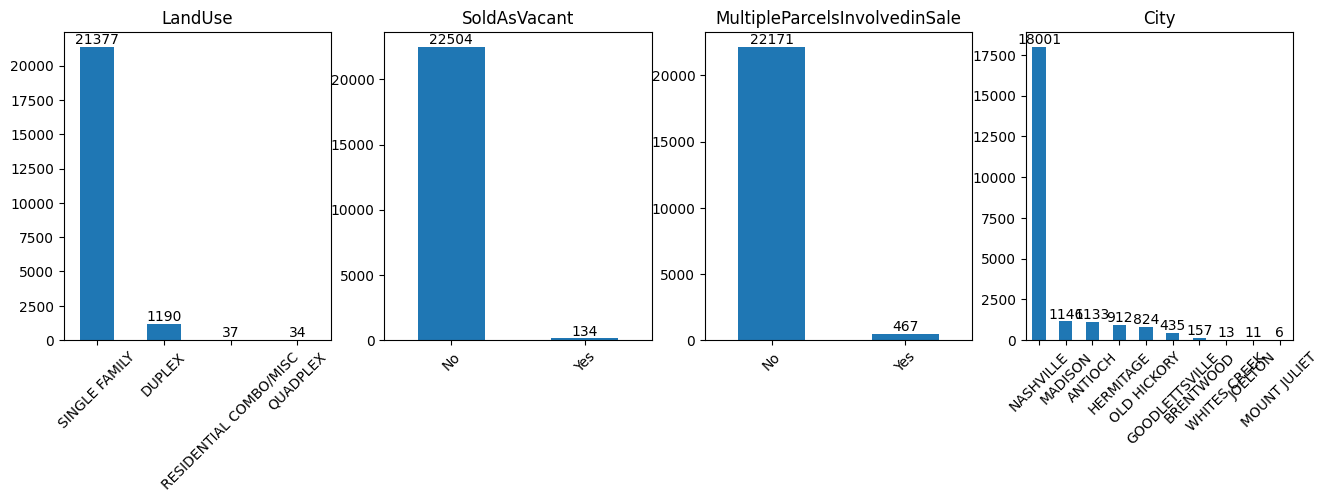

In [19]:
print('\033[1m' + 'plot 4. categorical distributions' +'\033[0m')
plt.figure(figsize=(20,4))
plt.subplot(1,5,1); ax = df.LandUse.value_counts().plot.bar(title='LandUse')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,2); ax = df.SoldAsVacant.value_counts().plot.bar(title='SoldAsVacant')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,3); ax = df.MultipleParcelsInvolvedinSale.value_counts().plot.bar(title='MultipleParcelsInvolvedinSale')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,4); ax = df.City.value_counts().plot.bar(title='City')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 5. categorical distributions


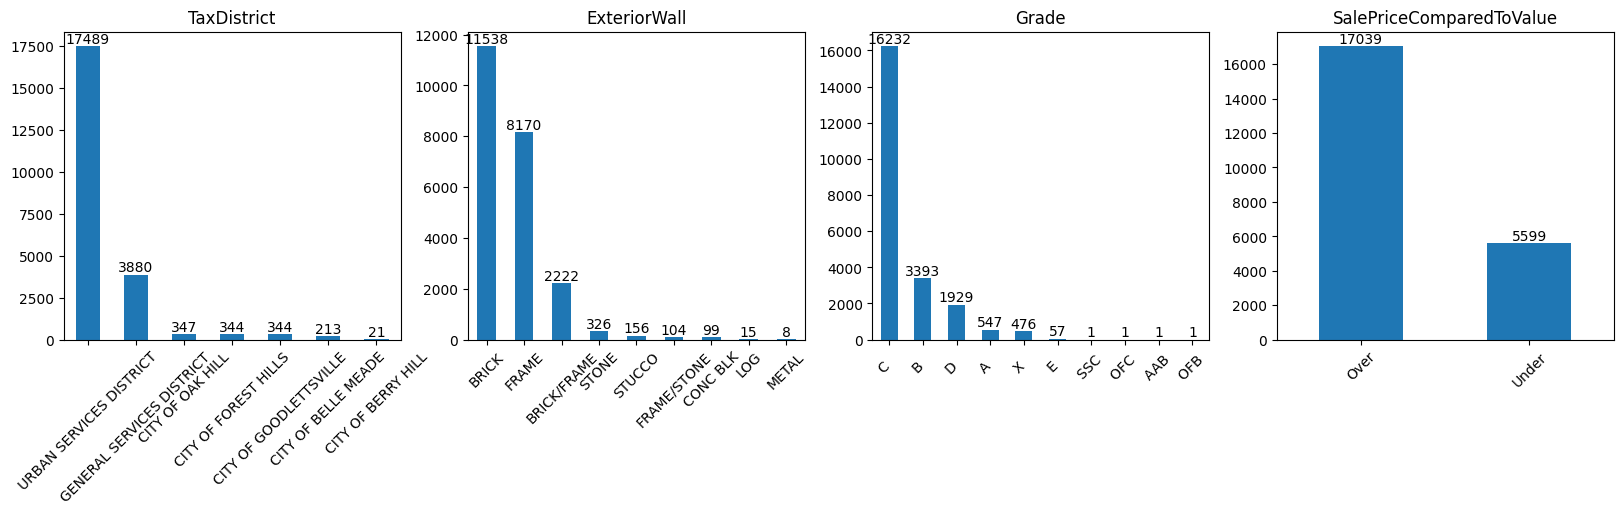

In [20]:
print('\033[1m' + 'plot 5. categorical distributions' +'\033[0m')
plt.figure(figsize=(20,4))
plt.subplot(1,4,1); ax = df.TaxDistrict.value_counts().plot.bar(title='TaxDistrict')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,2); ax = df.ExteriorWall.value_counts().plot.bar(title='ExteriorWall')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,3); ax = df.Grade.value_counts().plot.bar(title='Grade')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,4); ax = df.SalePriceComparedToValue.value_counts().plot.bar(title='SalePriceComparedToValue')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

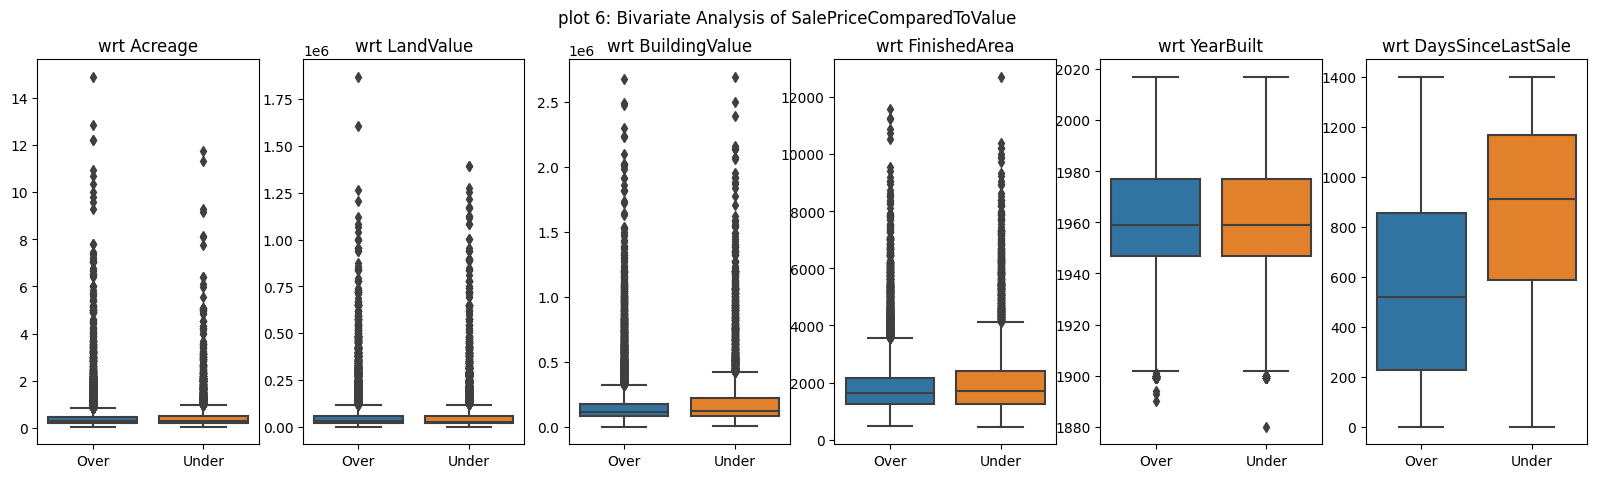

In [21]:
fig, axs = plt.subplots(1,6,figsize=(20,5))
fig.suptitle('plot 6: Bivariate Analysis of SalePriceComparedToValue')
sns.boxplot(ax=axs[0],x=df.SalePriceComparedToValue,y=df.Acreage).set(xlabel=None,ylabel=None,title='wrt Acreage')
sns.boxplot(ax=axs[1],x=df.SalePriceComparedToValue,y=df.LandValue).set(xlabel=None,ylabel=None,title='wrt LandValue')
sns.boxplot(ax=axs[2],x=df.SalePriceComparedToValue,y=df.BuildingValue).set(xlabel=None,ylabel=None,title='wrt BuildingValue')
sns.boxplot(ax=axs[3],x=df.SalePriceComparedToValue,y=df.FinishedArea).set(xlabel=None,ylabel=None,title='wrt FinishedArea')
sns.boxplot(ax=axs[4],x=df.SalePriceComparedToValue,y=df.YearBuilt).set(xlabel=None,ylabel=None,title='wrt YearBuilt')
sns.boxplot(ax=axs[5],x=df.SalePriceComparedToValue,y=df.DaysSinceLastSale).set(xlabel=None,ylabel=None,title='wrt DaysSinceLastSale')
plt.show()

In [22]:
tmp = pd.crosstab(df.LandUse,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [23]:
tmp = pd.crosstab(df.SoldAsVacant,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [24]:
tmp = pd.crosstab(df.MultipleParcelsInvolvedinSale,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [25]:
tmp = pd.crosstab(df.City,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [26]:
tmp = pd.crosstab(df.TaxDistrict,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [27]:
tmp = pd.crosstab(df.Neighborhood,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [28]:
tmp = pd.crosstab(df.FoundationType,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [29]:
tmp = pd.crosstab(df.ExteriorWall,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [30]:
tmp = pd.crosstab(df.Grade,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [31]:
tmp = pd.crosstab(df.Bedrooms,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [32]:
tmp = pd.crosstab(df.FullBath,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

In [33]:
tmp = pd.crosstab(df.HalfBath,df.SalePriceComparedToValue,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros','Under','Over','All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

C:\Users\soura\AppData\Local\Temp\ipykernel_5948\2641641675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True).set(title='plot 5: correlation matrix');


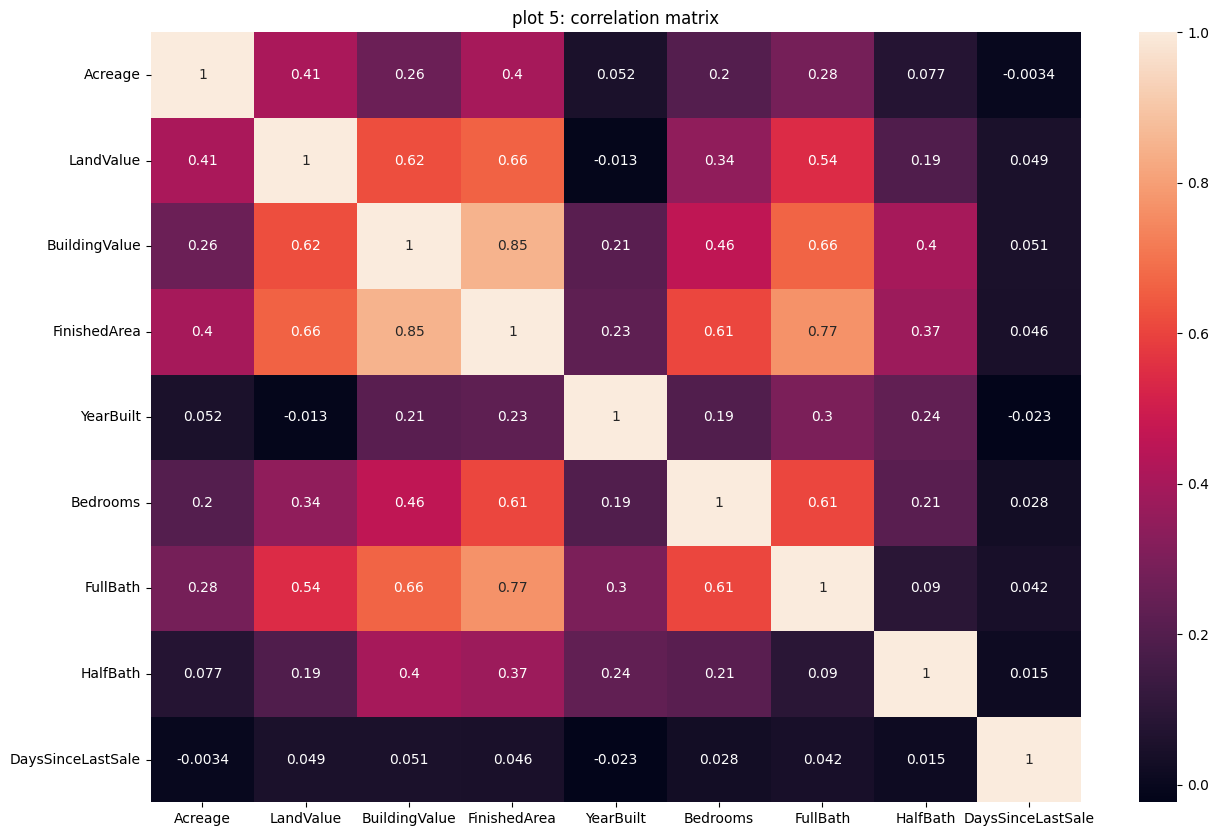

In [156]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True).set(title='plot 5: correlation matrix');

# Modeling, Benchmarking

## Logistic Regression

In [172]:
df_tmp = df[['LandUse','SoldAsVacant','MultipleParcelsInvolvedinSale','City','Acreage','TaxDistrict','LandValue','BuildingValue','FinishedArea','FoundationType','YearBuilt','ExteriorWall','Grade','Bedrooms','FullBath','HalfBath','SalePriceComparedToValue','DaysSinceLastSale']]
df_ec = pd.get_dummies(df_tmp,columns=["LandUse","SoldAsVacant","MultipleParcelsInvolvedinSale","City","TaxDistrict","FoundationType","ExteriorWall","Grade","SalePriceComparedToValue"],drop_first=True)

y_logr=df_ec[['SalePriceComparedToValue_Under']]
x_logr=df_ec.drop(['SalePriceComparedToValue_Under'],axis=1)
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

Xlog2 = sm.add_constant(x_train)
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: inf
         Iterations: 35
                                 Logit Regression Results                                 
Dep. Variable:     SalePriceComparedToValue_Under   No. Observations:                18110
Model:                                      Logit   Df Residuals:                    18059
Method:                                       MLE   Df Model:                           50
Date:                            Mon, 06 Feb 2023   Pseudo R-squ.:                     inf
Time:                                    03:20:53   Log-Likelihood:                   -inf
converged:                                  False   LL-Null:                        0.0000
Covariance Type:                        nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------

C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodel

In [117]:
df_ec = pd.get_dummies(df,columns=["LandUse","SoldAsVacant","MultipleParcelsInvolvedinSale","City","TaxDistrict","Neighborhood","FoundationType","ExteriorWall","Grade"],drop_first=True)

In [79]:
y_logr=df_ec[['SalePriceComparedToValue']]
x_logr=df_ec.drop(['SalePriceComparedToValue'],axis=1)

x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [176]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train,z_train.values.ravel())
z_pred=logreg.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[3264  115]
 [ 997  152]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.85      3379
           1       0.57      0.13      0.21      1149

    accuracy                           0.75      4528
   macro avg       0.67      0.55      0.53      4528
weighted avg       0.72      0.75      0.69      4528



Using the training set, a logistic regression model is built and tested on the test set. Using a manual stopwatch, the model took about half a second to run. The overall Accuracy was 75%, with Precision of 57% and Recall of 13%. The confusion matrix is given in the appendix. Analyzing significant variables and coefficients indicates that DaysSinceLastSell has the most impact on undervaluation, i.e. sold long back are undervalued. This is followed by the fact that if properties sold were vacant, they are undervalued. Next, lower land value and higher building value causes undervaluation. The latter may be because constructed building causes inflexibility to a new property owner. Lastly, multiple parties involved drive overvaluation.

## Decision Tree Model

In [175]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy",random_state=123,max_depth=6,min_samples_leaf=20)   
dt_model.fit(x_train,z_train)
z_pred = dt_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[3211  168]
 [ 845  304]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      3379
           1       0.64      0.26      0.38      1149

    accuracy                           0.78      4528
   macro avg       0.72      0.61      0.62      4528
weighted avg       0.75      0.78      0.74      4528



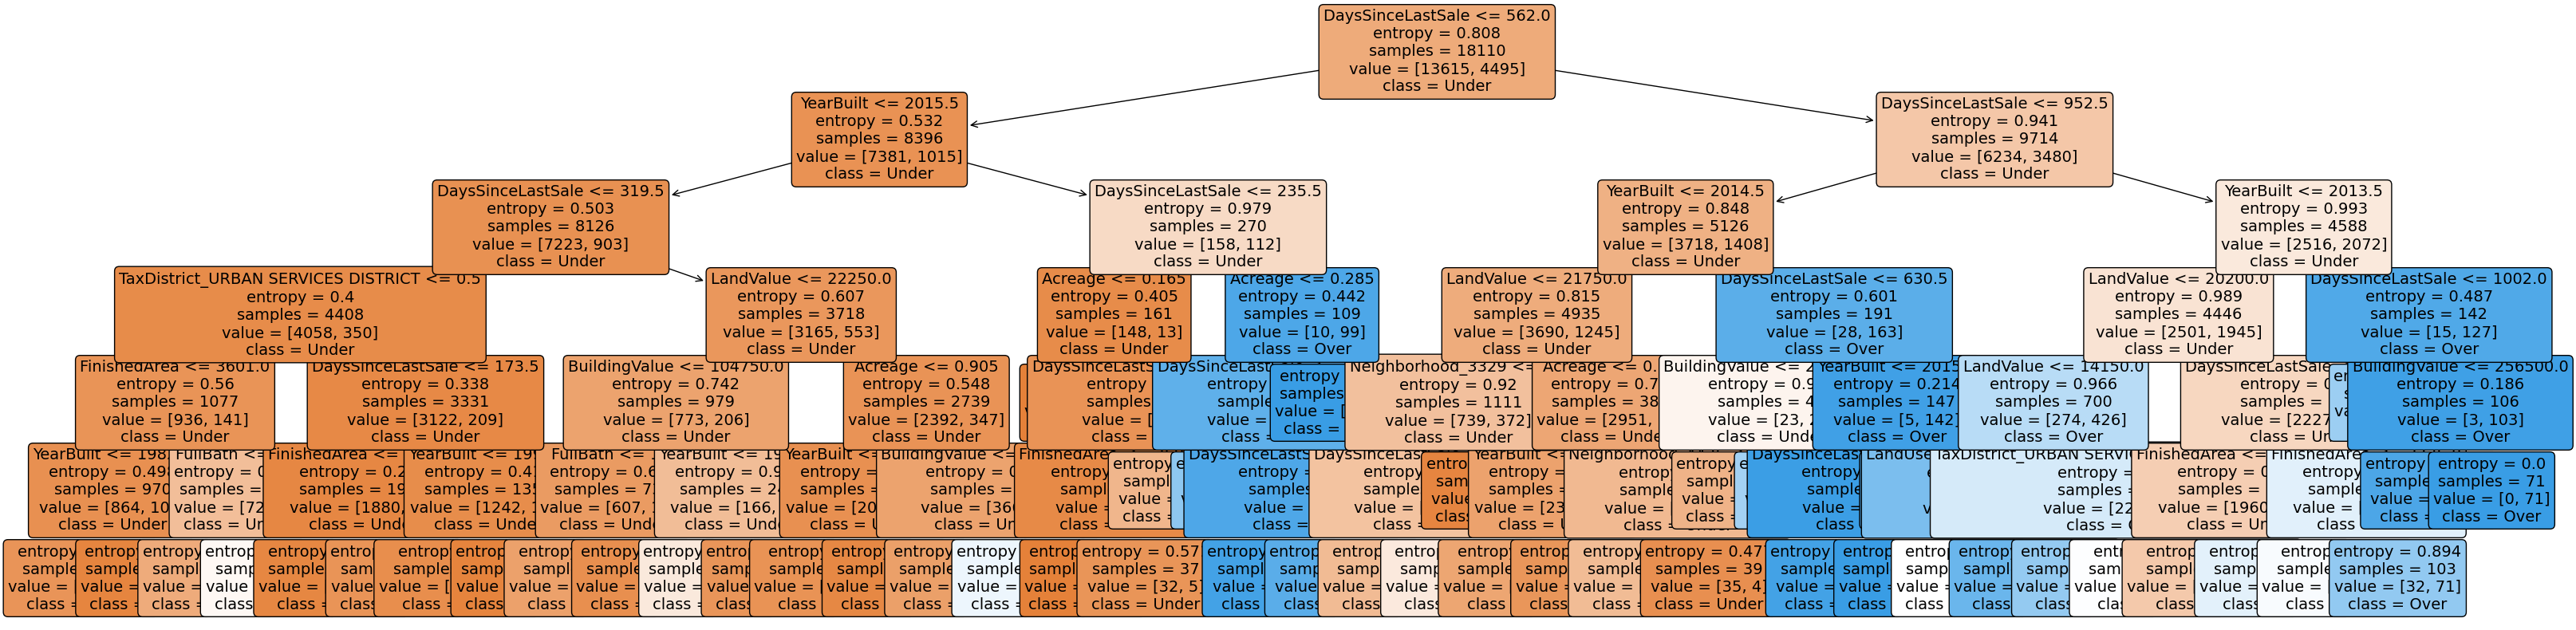

In [47]:
plt.figure(figsize=(40,10))
plot=tree.plot_tree(dt_model,feature_names=x_logr.columns.values.tolist(),class_names=['Under','Over'],filled=True,rounded=True,fontsize=14)

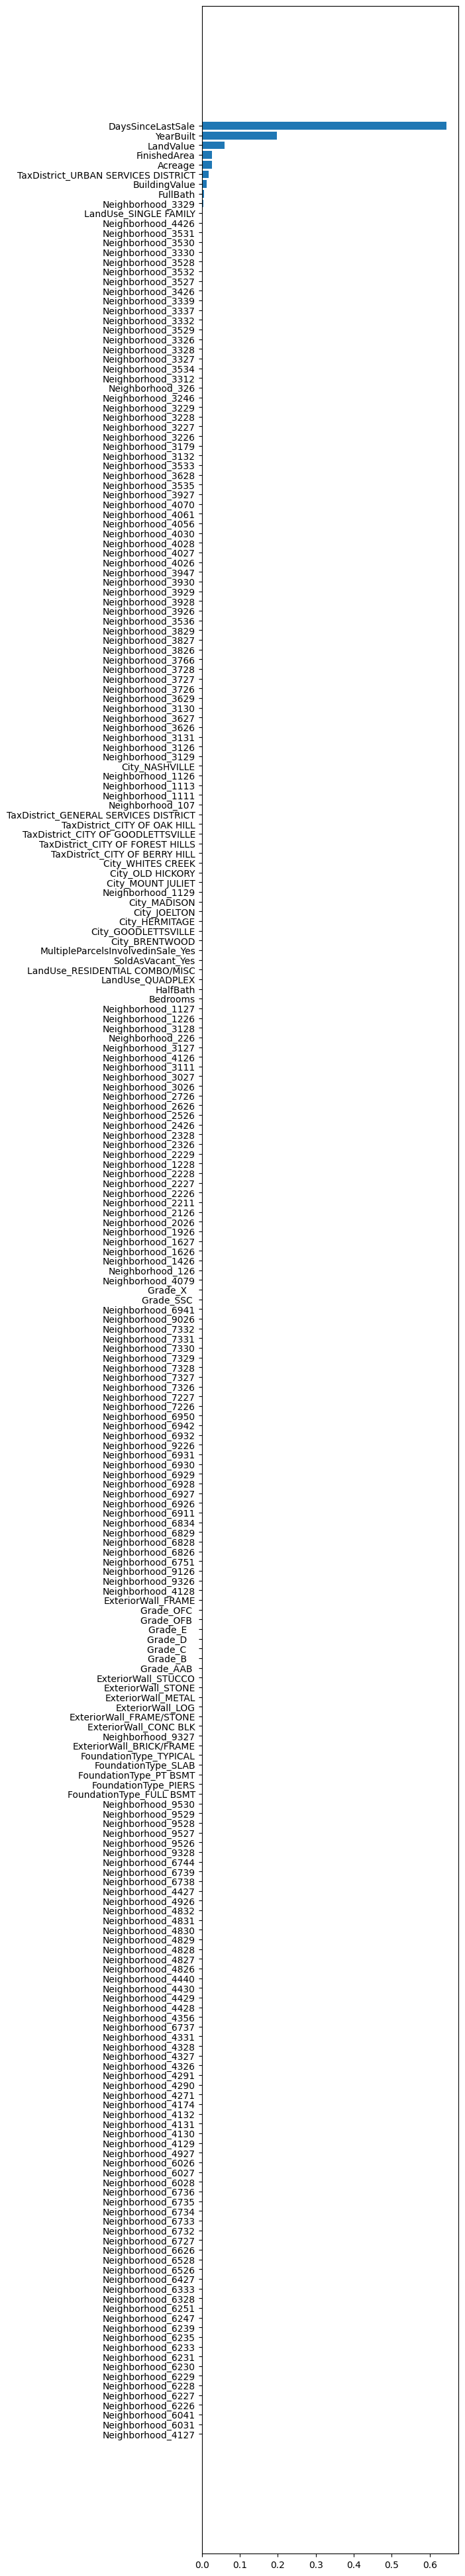

In [40]:
#Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(5,50))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

To build decision tree model, the entropy classifier was used. Iteratively, it was found that a maximum depth of 6 and minimum samples per leaf of 20 gave a relatively better Recall of 26%, while Precision was 64% and Accuracy was 78%. The model took less than half a second to run. The visual decision tree was plotted for interpretation. The feature importance calculated by the model gave the highest importance to DaysSinceLastSale, followed by YearBuild.

## Random Forest Model

In [179]:
#Random Forest
rf_model = RandomForestClassifier(random_state=123,n_estimators=50,max_depth=35)   
rf_model.fit(x_train,z_train.values.ravel())
z_pred = rf_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[3162  217]
 [ 785  364]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3379
           1       0.63      0.32      0.42      1149

    accuracy                           0.78      4528
   macro avg       0.71      0.63      0.64      4528
weighted avg       0.76      0.78      0.75      4528



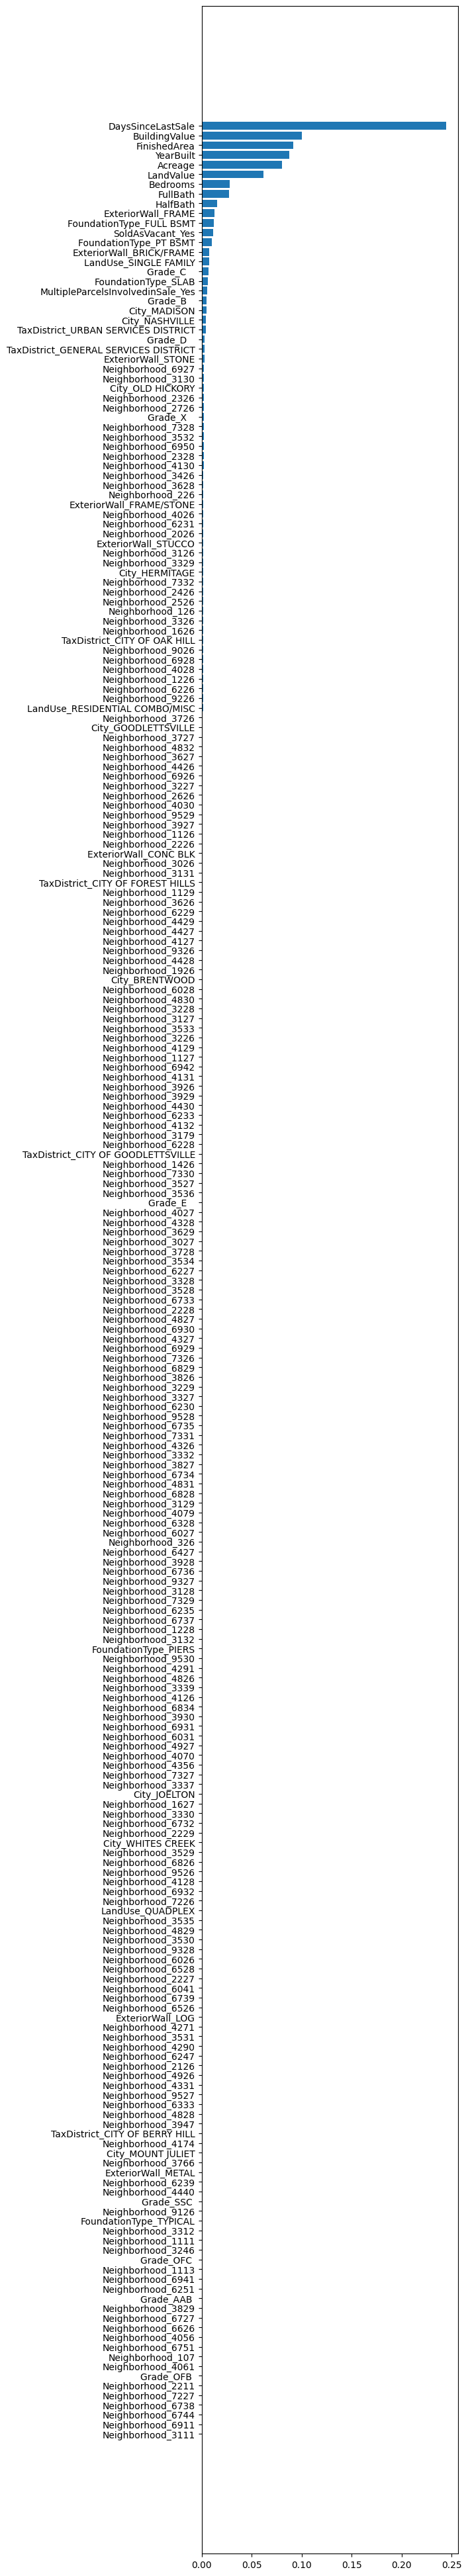

In [42]:
#Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(5,50))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

A Random Forest model was tuned to balance Recall and time to compute and arrived at 50 estimators (random trees) and 35 maximum depth. It took nearly 2.5 seconds, giving 78% Accuracy, 63% Precision and 32% Recall. The most important feature was again DaysSince-LastSale, followed by BuildingValue, FinishedArea, YearBuilt, Acreage and LandValue. 

## Gradient Boosting Model

In [180]:
#Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=123,max_depth=4,n_estimators=100)   
gb_model.fit(x_train,z_train.values.ravel())
z_pred = gb_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[3248  131]
 [ 829  320]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      3379
           1       0.71      0.28      0.40      1149

    accuracy                           0.79      4528
   macro avg       0.75      0.62      0.64      4528
weighted avg       0.77      0.79      0.75      4528



In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22638 entries, 0 to 22650
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LandUse                        22638 non-null  object 
 1   SoldAsVacant                   22638 non-null  object 
 2   MultipleParcelsInvolvedinSale  22638 non-null  object 
 3   City                           22638 non-null  object 
 4   Acreage                        22638 non-null  float64
 5   TaxDistrict                    22638 non-null  object 
 6   Neighborhood                   22638 non-null  object 
 7   LandValue                      22638 non-null  int64  
 8   BuildingValue                  22638 non-null  int64  
 9   FinishedArea                   22638 non-null  float64
 10  FoundationType                 22638 non-null  object 
 11  YearBuilt                      22638 non-null  int64  
 12  ExteriorWall                   22638 non-null 

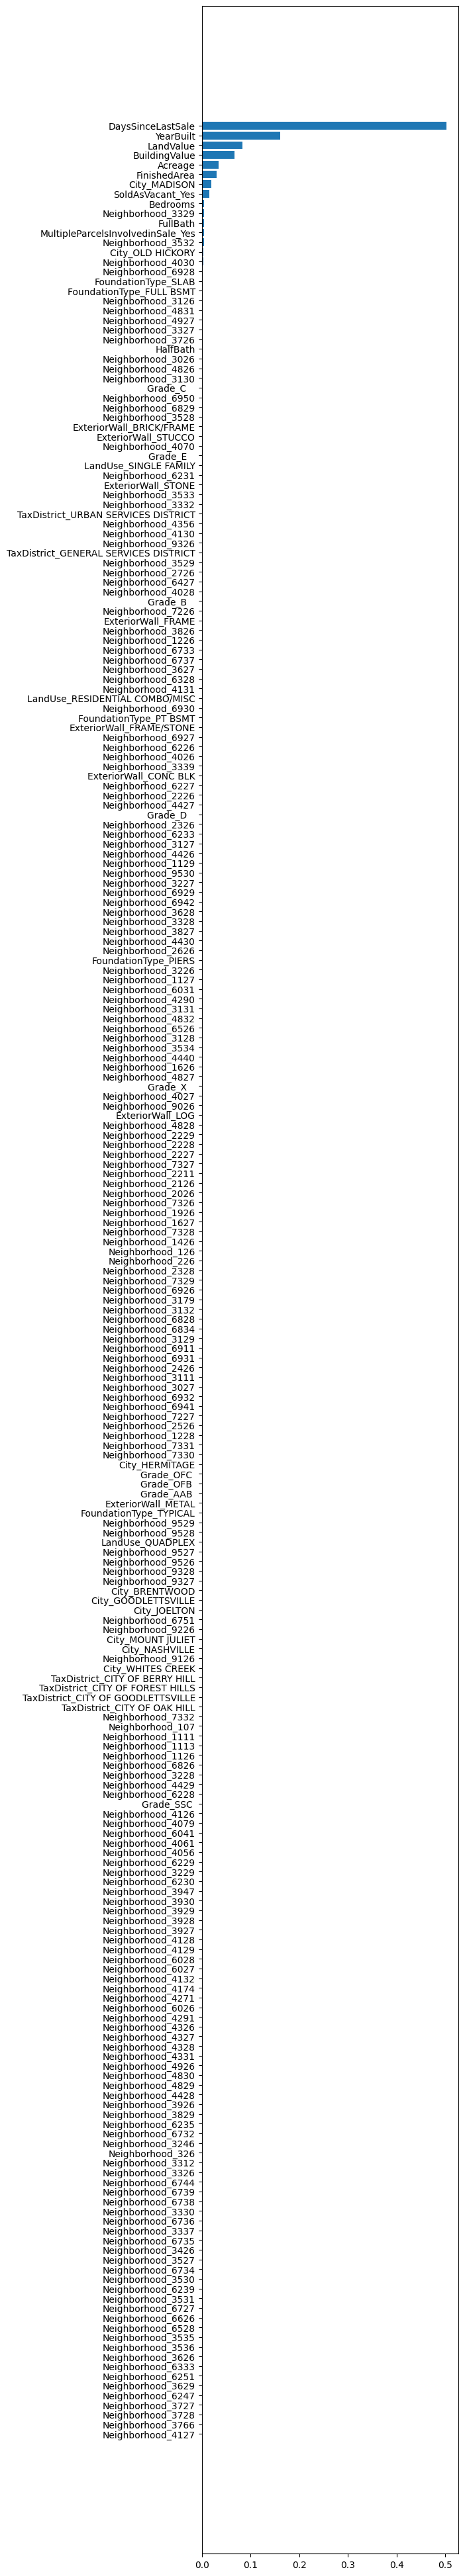

In [44]:
#Feature Importance
importances = gb_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(5,50))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

The best parameters for gradient boosting model were found at a max depth of 4 and estimators (trees in series) of 100. The model took 6 seconds to run, giving 79% Accuracy, 71% Precision and 28% Recall. The most important feature was DaysSinceLastSale, followed by Year Built, LandValue and BuildingValue. All confusion matrix tables are given in the appendix. 

# Conclusion

To predict undervalued properties to be visited by the real estate company’s team for further evaluation, the data was cleansed with final 19 columns and 22638 rows with a major positive correlation found between FinishedArea with each of BuildingValue and FullBath.

Models using four techniques were built to predict whether the recent sale price was over or undervalued. Overall Accuracy of all models was more or less the same, however the Random Forest model is recommended for predicting undervalued properties to visit and overvalued ones to avoid. From multiple techniques, undervaluation is most impacted by the sale date, in a way that properties sold long back are undervalued, possibly due to inflation over time. Other factors causing undervaluation are lower land value, higher building value (since buildings cause inflexibility) and earlier year built of the property, in descending order of importance.